# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [28]:
library("tidyverse")

In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [29]:
measles = read_csv(
            "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv",
            col_types=cols()) %>%
    mutate(mmr = ifelse(is.na(mmr), -1, mmr))

The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [31]:
# create the df_vacc_rates here

df_vacc_rates = measles %>%
    filter(mmr>=0) %>%
    group_by(state) %>%
    summarize(fraction = sum(mmr >= 95, na.rm=TRUE) / n())

df_vacc_rates


state,fraction
<chr>,<dbl>
Arizona,0.506404782
Arkansas,0.003527337
California,0.888506151
Colorado,0.623092236
Connecticut,0.811544992
Illinois,0.896825397
Maine,0.473389356
Massachusetts,0.865828092
Minnesota,0.473948525


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [32]:
df_vacc_rates %>%
    filter(fraction == min(fraction))

state,fraction
<chr>,<dbl>
Arkansas,0.003527337


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [54]:
ecdf = measles %>%
    filter(state == "North Carolina", overall != -1) %>%
    arrange(overall) %>%
    mutate(rn = row_number(), fraction_of_schools = rn / max(rn))

library("ggrepel")

df_label = data.frame(
    overall=95,
    y=0.6
)

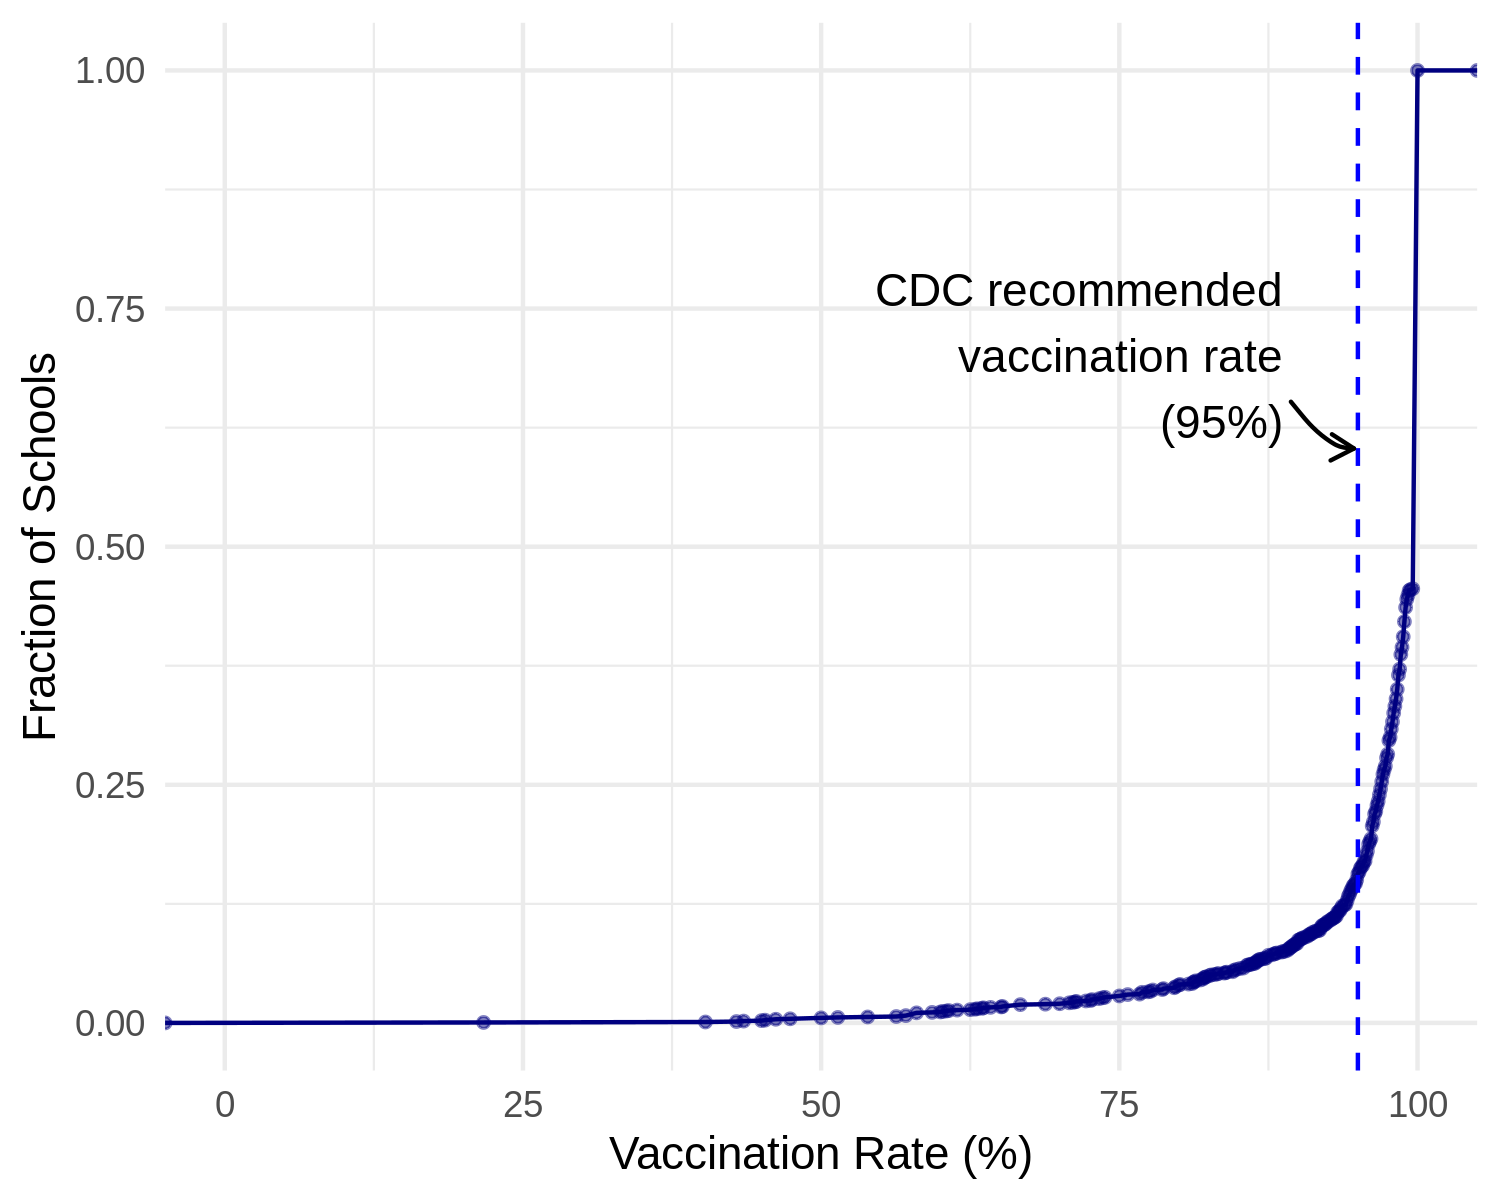

In [75]:
p = ggplot(ecdf, aes(x=overall))

p = p + stat_ecdf(geom = "line", size = .5, color="navy") + stat_ecdf(geom = "point", size = 1, color="navy", alpha=.5)

p = p + geom_vline(xintercept=95, linetype = "dashed", color="blue")

p = p + theme_minimal()

p = p + xlab("Vaccination Rate (%)") + ylab("Fraction of Schools")

p = p + xlim(0,100)

p = p + geom_text_repel(
    data = df_label, mapping=aes(x=overall, y=y), 
    nudge_x = -7.5,
    nudge_y = 0.10,
    segment.curvature = 0.1,
    label = "CDC recommended\n vaccination rate\n (95%)",
    hjust= "right",
    arrow = arrow(length = unit(0.025, "npc"))
)

p


(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

 ![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [76]:
measles %>%
    filter(state == "North Carolina", overall != -1) %>%
    summarize(mean(overall))


mean(overall)
<dbl>
96.82606


Yes!